<a href="https://colab.research.google.com/github/CECILIACFR/DATASCIENCE/blob/main/Visualiza%C3%A7%C3%A3oDados_Aula2_GRAFICO_LINHAipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
# imports necessários
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Patch, Polygon
from matplotlib.lines import Line2D

from IPython.display import display, Markdown
## Verifica a versão da matplotlib instalada
mpl.__version__


'3.7.1'

In [72]:
# Informa o cabeçalho das colunas
colunas = ['REGIAO', '1872', '1890', '1900', '1920', '1940', '1950', '1960', '1970', '1980', '1991', '2000', '2010']

In [73]:
# Lê o arquivo utilizando as colunas informadas
dataset = pd.read_csv(url, names=colunas, skiprows=1, delimiter=',')

In [74]:

dataset.head()

,REGIAO,1872,1890,1900,1920,1940,1950,1960,1970,1980,1991,2000,2010
0,Norte,332847,476370,695112,1439052,1627608,2048696,2930005,4188313,6767249,10257266,12893561,15864454
1,Nordeste,4638560,6002047,6749507,11245921,14434080,17973413,22428873,28675110,35419156,42470225,47693253,53081950
2,Sudeste,4016922,6104384,7824011,13654934,18345831,22548494,31062978,40331969,52580527,62660700,72297351,80364410
3,Sul,721337,1430715,1796495,3537167,5735305,7840870,11892107,16683551,19380126,22117026,25089783,27386891
4,Centro-Oeste,220812,320399,373309,758531,1093491,1532924,2678380,4629640,7003515,9412242,11616745,14058094


In [75]:
# use first column as index
dataset = dataset.set_index('REGIAO')

In [76]:
# adjust scale (in millions)
dataset = dataset.astype(float) / 1000000

In [77]:
print(dataset)

                  1872      1890      1900       1920       1940       1950  \
REGIAO                                                                        
Norte         0.332847  0.476370  0.695112   1.439052   1.627608   2.048696   
Nordeste      4.638560  6.002047  6.749507  11.245921  14.434080  17.973413   
Sudeste       4.016922  6.104384  7.824011  13.654934  18.345831  22.548494   
Sul           0.721337  1.430715  1.796495   3.537167   5.735305   7.840870   
Centro-Oeste  0.220812  0.320399  0.373309   0.758531   1.093491   1.532924   

                   1960       1970       1980       1991       2000       2010  
REGIAO                                                                          
Norte          2.930005   4.188313   6.767249  10.257266  12.893561  15.864454  
Nordeste      22.428873  28.675110  35.419156  42.470225  47.693253  53.081950  
Sudeste       31.062978  40.331969  52.580527  62.660700  72.297351  80.364410  
Sul           11.892107  16.683551  19.38

In [78]:
# Mostra as dimensões do dataset
print(dataset.shape)

(5, 12)


In [79]:
# Mostra as informações do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Norte to Centro-Oeste
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1872    5 non-null      float64
 1   1890    5 non-null      float64
 2   1900    5 non-null      float64
 3   1920    5 non-null      float64
 4   1940    5 non-null      float64
 5   1950    5 non-null      float64
 6   1960    5 non-null      float64
 7   1970    5 non-null      float64
 8   1980    5 non-null      float64
 9   1991    5 non-null      float64
 10  2000    5 non-null      float64
 11  2010    5 non-null      float64
dtypes: float64(12)
memory usage: 520.0+ bytes
None


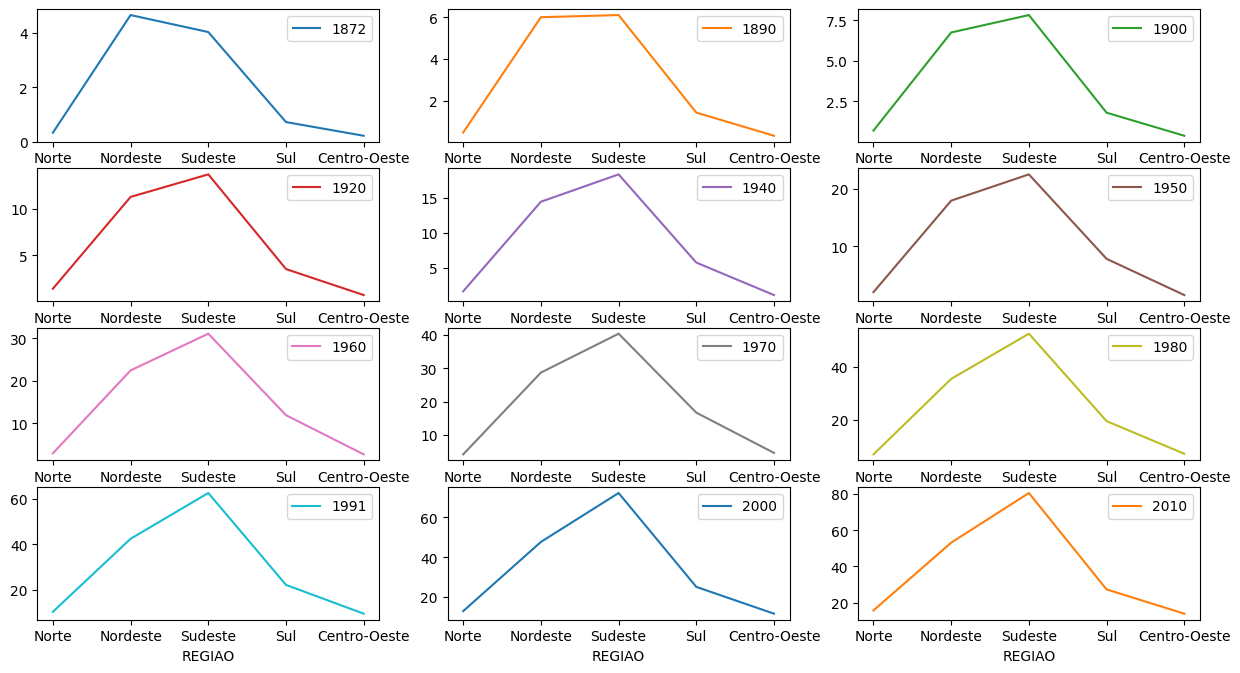

In [80]:
# Density Plot
dataset.plot(kind = 'line', subplots = True, layout = (5,3), sharex = False, figsize = (15,10))
plt.show()

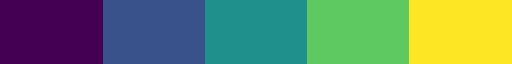

In [81]:
# carregando a paleta diretamente do próprio matplotlib
# a paleta "viridis" é robusta para pessoas com daltonismo
vcmap = plt.get_cmap("viridis", 5)

# exibe o mapa de cores
vcmap

In [82]:
# criando um array de seis cores da paleta "viridis" em hexadecimal
coresViridis = [mpl.colors.rgb2hex(vcmap(i)) for i in range(5)]

# exibindo a lista de cores
coresViridis

['#440154', '#3b528b', '#21918c', '#5ec962', '#fde725']

In [83]:
# define uma cor padrão
corDefault = coresViridis[1]

In [84]:
# Definindo parâmetros dos gráficos
plt.rcdefaults()
# plt.rc("axes", facecolor="#fafafa", grid = True)
# plt.rc("grid", color="#f0f0f0")
# plt.rc("axes", edgecolor="#cccccc", lw = 0.1)

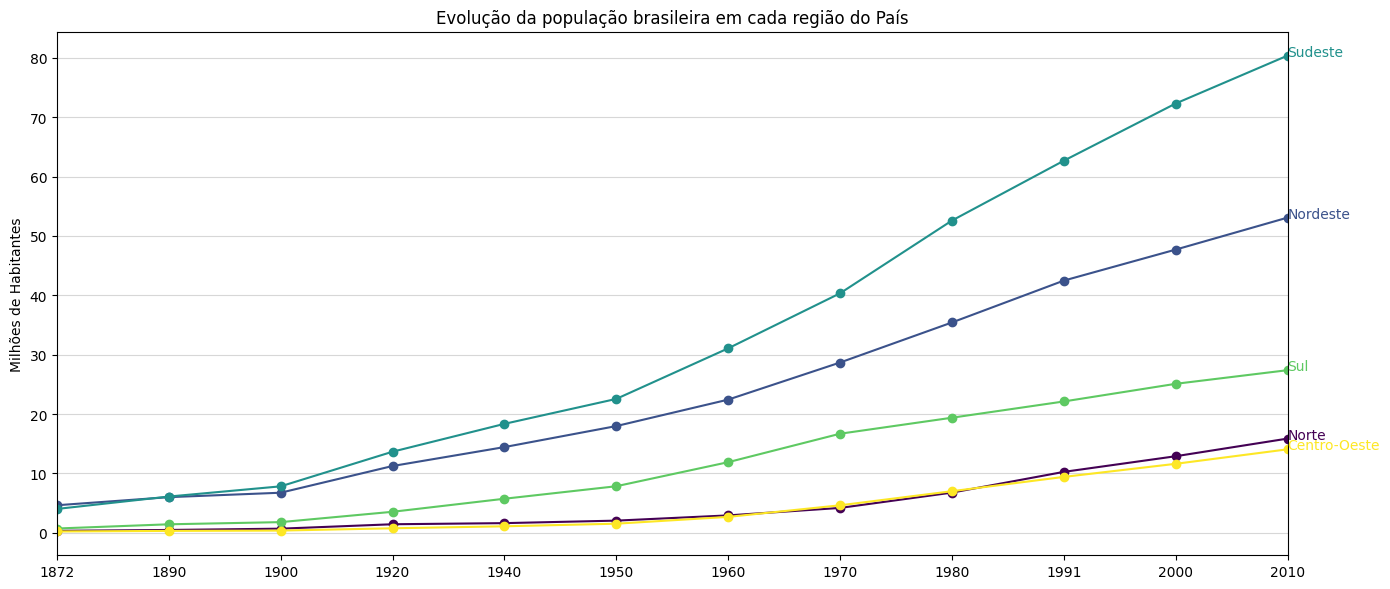

In [85]:
# cria a figura com 20 x 5 polegadas, retorna os eixos
fig, ax = plt.subplots(figsize=(14,6))

# percorre as linhas das 5 regiões e plota nos eixos
for i in range(len(dataset.index)):
  ax.plot(
      dataset.columns,           # valores eixo x
      dataset.iloc[i],           # valores eixo y
      marker = 'o',             # marcador de coordenada
      label = dataset.index[i],  # rotulo da linha
      color = coresViridis[i]   # cor da linha
  )

# define título
ax.set_title('Evolução da população brasileira em cada região do País')
# define rótulo do eixo y
ax.set_ylabel('Milhões de Habitantes')

ax.grid(axis = 'y', alpha = 0.5)

# obtém listas com as linhas e rótulos
handles = ax.get_legend_handles_labels()

# define os limites do eixo x
plt.xlim(left = 0, right = max(handles[0][0].get_xdata()))

# itera sobre as cinco regiões e anota os respectivos rótulos no final das respectivas linhas
for i in range(len(dataset.index)):
  maxx = max(handles[0][i].get_xdata()) # dados X da linha
  maxy = max(handles[0][i].get_ydata()) # dados Y da linha
  label = handles[1][i]                 # rótulo da linha (parâmetro label no Axes.plot)
  ax.annotate(text = label, xy = (maxx, maxy), color = handles[0][i].get_color(), size = 10)

# ajusta os parametros do subplot para caber dentro da figura
plt.tight_layout()
